#Imports and Data


In [1]:
!pip install empath
import pandas as pd
from empath import Empath


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57822 sha256=0380be485154e55cbb25533a3a193765774d41d5b6f0f2081582d7fa8124c7c8
  Stored in directory: /root/.cache/pip/wheels/2a/e5/c2/fd8dad0a452927c85ecd3c6cbaa4748125246eed73d8303184
Successfully built empath


In [ ]:

filepath_adhd = "/content/drive/MyDrive/adhdreddit/FinalData/adhd_posts_cleaned.csv"
filepath_adhdwomen = "/content/drive/MyDrive/adhdreddit/FinalData/adhdwomen_posts_cleaned.csv"
filepath_askreddit = "/content/drive/MyDrive/adhdreddit/FinalData/askreddit_posts_cleaned.csv"

print("------ADHD-------")
adhd_df = pd.read_csv(filepath_adhd, error_bad_lines=False)
print(adhd_df.info())

print("------ADHDWomen------")
adhdwomen_df = pd.read_csv(filepath_adhdwomen, error_bad_lines=False)
print(adhdwomen_df.info())

print("-----Askreddit------")
askreddit_df = pd.read_csv(filepath_askreddit, error_bad_lines=False)
print(askreddit_df.info())

------ADHD-------


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315344 entries, 0 to 315343
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               315344 non-null  int64 
 1   id                       315344 non-null  object
 2   created_utc              315344 non-null  object
 3   subreddit_name_prefixed  315344 non-null  object
 4   title                    315344 non-null  object
 5   selftext                 315344 non-null  object
 6   content                  315344 non-null  object
 7   content_copy             315344 non-null  object
dtypes: int64(1), object(7)
memory usage: 19.2+ MB
None
------ADHDWomen------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37664 entries, 0 to 37663
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               37664 non-null  int64 
 1   

# Labelling


In [ ]:
lexicon = Empath()
def empath(df):
  for index, row in df.iterrows():
    sentiment = lexicon.analyze(row["content"], normalize=True)
    for k,v  in sentiment.items():
      df.at[index,k] = sentiment[k]
  return df


In [ ]:
adhd_df_labelled = empath(adhd_df)
adhd_df_labelled.to_csv("/content/drive/MyDrive/adhdreddit/Empath/adhd_df_labelled.csv")

In [ ]:
adhdwomen_df_labelled = empath(adhdwomen_df)
adhdwomen_df_labelled.to_csv("/content/drive/MyDrive/adhdreddit/Empath/adhdwomen_df_labelled.csv")

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [ ]:
askreddit_df_labelled = empath(askreddit_df)
askreddit_df_labelled.to_csv("/content/drive/MyDrive/adhdreddit/Empath/askreddit_df_labelled.csv")

# Visualizing


## Data / imports

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


sns.set_theme(style="ticks", palette="Blues_r")

In [3]:
adhd_df_labelled= pd.read_csv("/content/drive/MyDrive/adhdreddit/Empath/adhd_df_labelled.csv", error_bad_lines=False)
adhdwomen_df_labelled= pd.read_csv("/content/drive/MyDrive/adhdreddit/Empath/adhdwomen_df_labelled.csv", error_bad_lines=False)
askreddit_df_labelled = pd.read_csv("/content/drive/MyDrive/adhdreddit/Empath/askreddit_df_labelled.csv", error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
subreddits_df = pd.concat([adhd_df_labelled,askreddit_df_labelled])
subreddits_df = subreddits_df[subreddits_df["subreddit_name_prefixed"]!="r/cofounder"]

## Functions


In [5]:
def df_plot_column(df,column,threshold):
  df['created_utc'] = pd.to_datetime(df['created_utc'], format = '%Y-%m-%d')

  df_grouped = df.groupby([pd.Grouper(key='created_utc', freq='m')]).agg(over=pd.NamedAgg(column=column, aggfunc=lambda x: (x > threshold).sum()), 
            under=pd.NamedAgg(column=column, aggfunc=lambda x: (x == 0).sum())).reset_index()
  df_grouped["over"] = df_grouped["over"]/(df_grouped["over"] + df_grouped["under"])*100
  df_grouped.plot(y="over",x="created_utc",kind="line")

In [134]:
def df_plot_columns(df,column,threshold):

  df['created_utc'] = pd.to_datetime(df['created_utc'], format = '%Y-%m-%d')
  df_grouped = df.groupby(["subreddit_name_prefixed",pd.Grouper(key='created_utc', freq='m')])[column].mean().reset_index()
  df_grouped["over"] = df_grouped["over"]/(df_grouped["over"] + df_grouped["under"])*100

  fig, ax = plt.subplots(figsize = (10,6))
  sns.lineplot(palette = ["navy","red"], data = df_grouped ,y = "over",x="created_utc",hue="subreddit_name_prefixed")
  years = mdates.YearLocator()   # every year
  months = mdates.MonthLocator()  # every month
  years_fmt = mdates.DateFormatter('%Y%b') 
  months_fmt = mdates.DateFormatter('%b') 
  
  ax.xaxis.set_major_locator(years)
  ax.xaxis.set_major_formatter(years_fmt)
  ax.xaxis.set_minor_locator(months)
  ax.xaxis.set_minor_formatter(months_fmt)

  plt.legend(title = "Subreddit")
  plt.ylabel(column +" score")
  plt.xlabel("Date")

  plt.xticks(rotation = 'vertical')
  for text in ax.get_xminorticklabels():
    text.set_rotation(90)
  plt.title("Average score of "+ column + " over time")
  plt.show()


### Mean

In [7]:
def df_plot_column_mean(df,column,threshold):
  df['created_utc'] = pd.to_datetime(df['created_utc'], format = '%Y-%m-%d')
  df_grouped = df.groupby([pd.Grouper(key='created_utc', freq='m')])[column].mean().reset_index()
  df_grouped["Posts containing "+column] = df_grouped[column]*100

  df_grouped.plot(y = "Posts containing "+column,x="created_utc",kind="line")


In [150]:
def df_plot_columns_mean(df,column,threshold):
  df['created_utc'] = pd.to_datetime(df['created_utc'], format = '%Y-%m-%d')
  df_grouped = df.groupby(["subreddit_name_prefixed",pd.Grouper(key='created_utc', freq='m')])[column].mean().reset_index()
  df_grouped["Posts containing "+column] = df_grouped[column]*100

  sns.set_palette(["navy","red"])

  fig, ax = plt.subplots(figsize = (10,6))
  sns.lineplot(data = df_grouped ,y = "Posts containing "+column,x="created_utc",hue="subreddit_name_prefixed")
  years = mdates.YearLocator()   # every year
  months = mdates.MonthLocator()  # every month
  years_fmt = mdates.DateFormatter('%Y%b') 
  months_fmt = mdates.DateFormatter('%b') 

  ax.xaxis.set_major_locator(years)
  ax.xaxis.set_major_formatter(years_fmt)
  ax.xaxis.set_minor_locator(months)
  ax.xaxis.set_minor_formatter(months_fmt)

  plt.legend(title = "Subreddit")
  plt.ylabel(column+" score")
  plt.xlabel("Date")

  plt.xticks(rotation = 'vertical')
  for text in ax.get_xminorticklabels():
    text.set_rotation(90)
  plt.title("Average score of " +column + " over time.")
  plt.show()

In [ ]:
d = subreddits_df[["content","created_utc","anger","positive_emotion"]]
d

## graphs

In [125]:
adhd = subreddits_df[subreddits_df.subreddit_name_prefixed == "r/ADHD"]
askreddit = subreddits_df[subreddits_df.subreddit_name_prefixed == "r/AskReddit"]


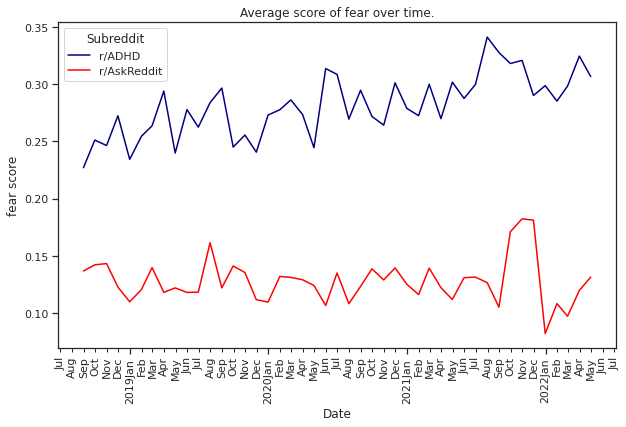

In [151]:
df_plot_columns_mean(subreddits_df,"fear",313)

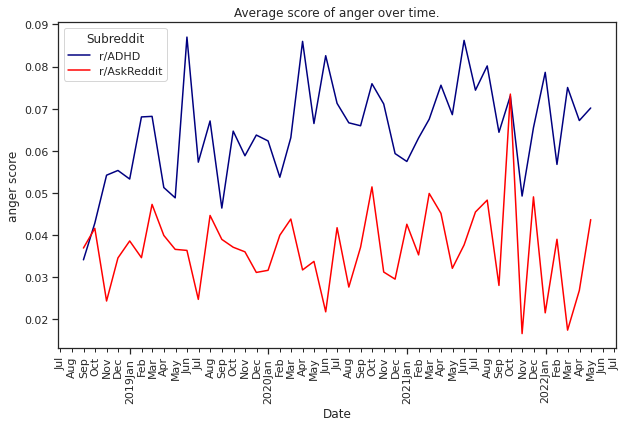

In [152]:
df_plot_columns_mean(subreddits_df,"anger",0.1)

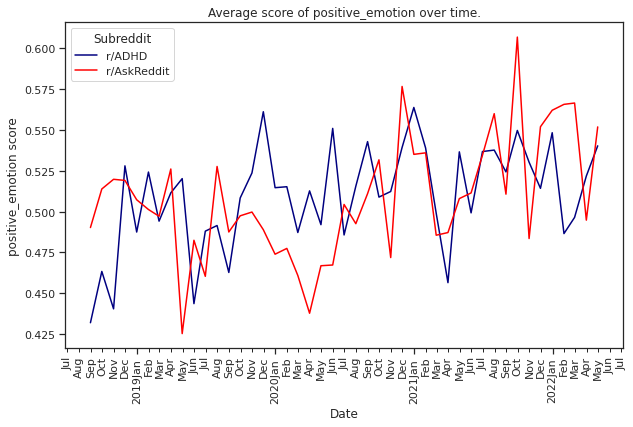

In [153]:
df_plot_columns_mean(subreddits_df,"positive_emotion",0.1)

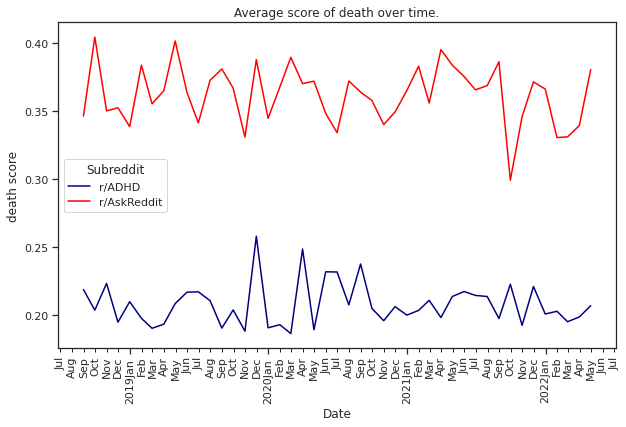

In [154]:
df_plot_columns_mean(subreddits_df,"death",0.05)

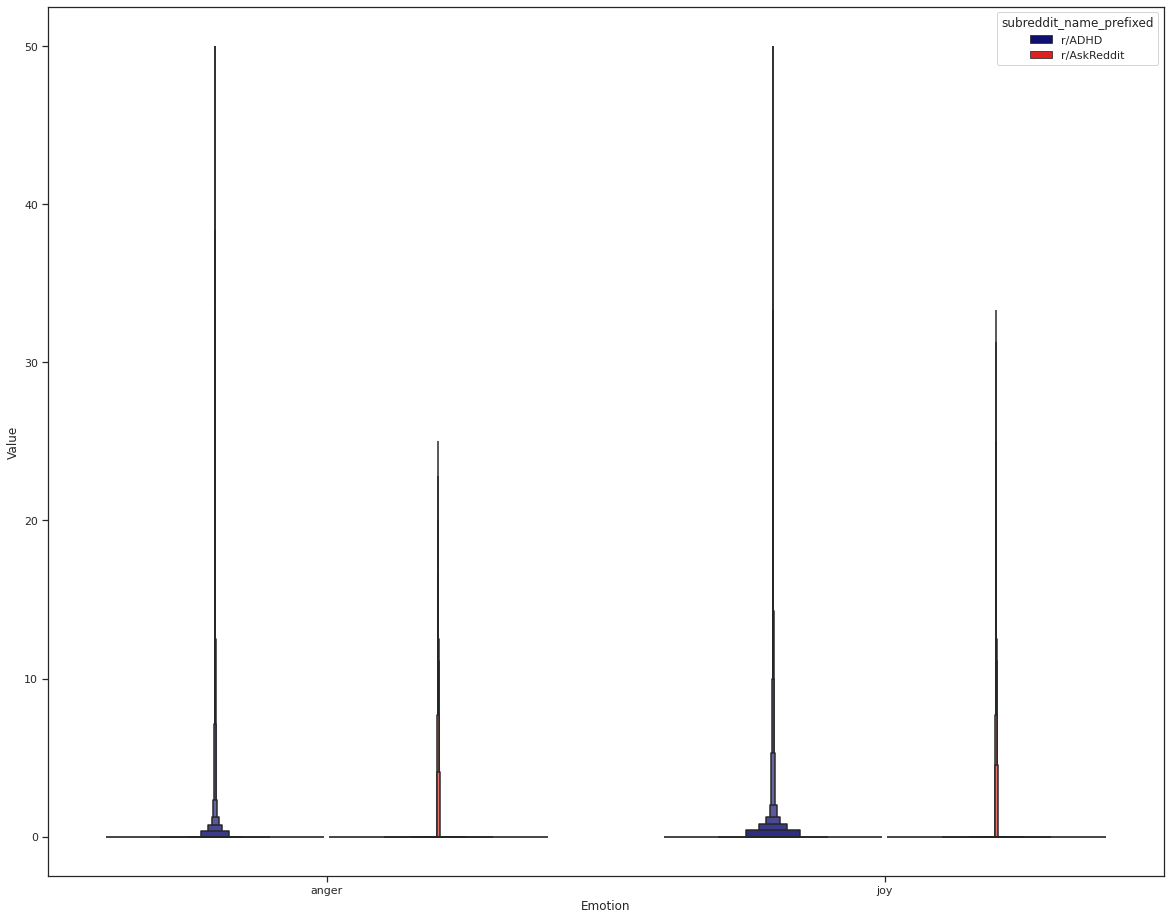

In [155]:
plt.figure(figsize=(20,16))

emotions = ["anger","joy","anger"]
df_melted = subreddits_df.melt(id_vars = ["subreddit_name_prefixed"],value_vars=emotions, value_name='Value', var_name='Emotion')
df_melted["Value"] = df_melted["Value"]*100
sns.boxenplot(data = df_melted, y = "Value", x="Emotion",hue = "subreddit_name_prefixed",showfliers=False)


In [ ]:
df_melted.max()

subreddit_name_prefixed    r/AskReddit
Emotion                            joy
Value                            400.0
dtype: object

##Frequency per topic*

In [ ]:
def graph_frequency(data, topic):  

  data['created_utc'] = pd.to_datetime(data['created_utc'], format = '%Y-%m-%d')
  totals = data.groupby([pd.Grouper(key='created_utc', freq='m')])["content"].count().reset_index(name="count")
  data = data[data["content"].str.contains(topic)]
  data = data.groupby([pd.Grouper(key='created_utc', freq='m')])["content"].count().reset_index(name="count")
  fig, ax = plt.subplots(figsize = (15, 7))
  data["count"]= data["count"]/totals["count"] *100
  sns.lineplot(ax = ax,data=data, x="created_utc", y="count")
  plt.xticks(rotation=45, ha="right")
  plt.title("Frequency of posts over time on posts classified as "+ topic)
  plt.show()

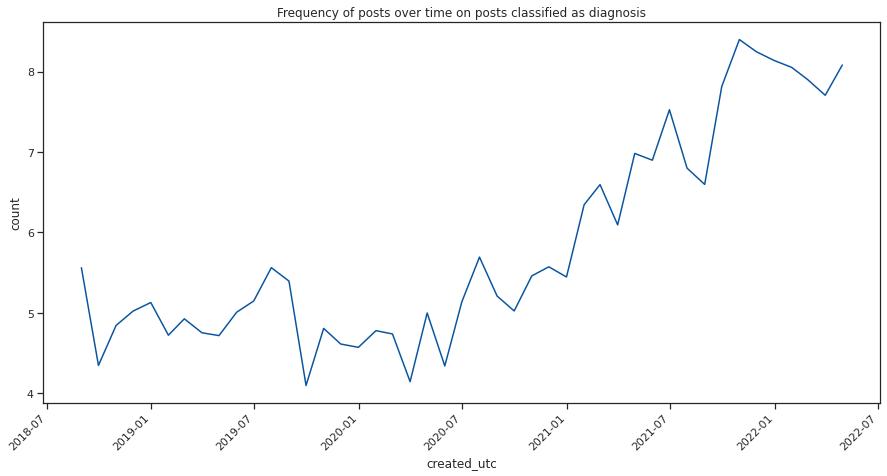

In [ ]:
graph_frequency(adhd_df_labelled,"diagnosis")

In [ ]:
diagnosis = adhd_df_labelled[adhd_df_labelled["content"].str.contains("diagnosis")]

<ipython-input-17-ebebfb8f6473>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_utc'] = pd.to_datetime(df['created_utc'], format = '%Y-%m-%d')


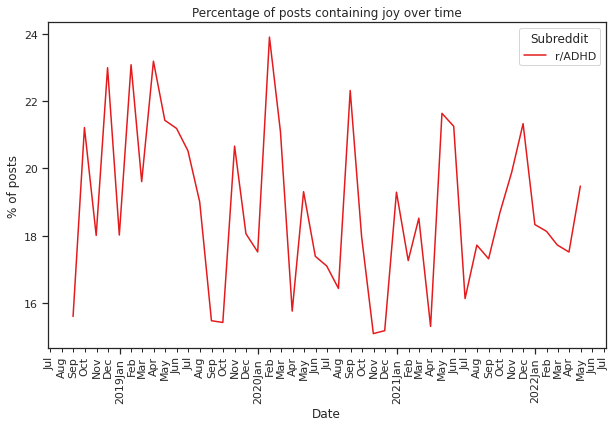

In [ ]:
df_plot_columns(diagnosis,"joy",0.001)

## Graphs

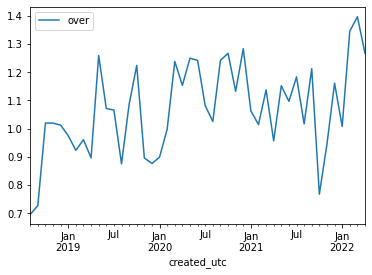

In [ ]:
df_plot_column(df,"anger",0.01) 

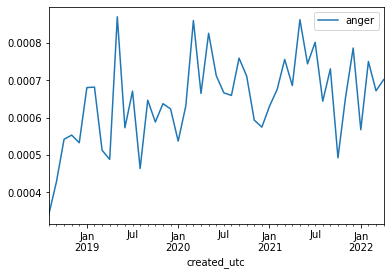

In [ ]:
df_plot_column_mean(df,"anger",0)

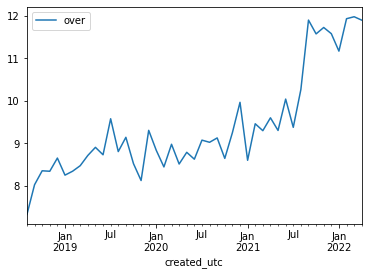

In [ ]:
df_plot_column(df,"sadness",0.01)

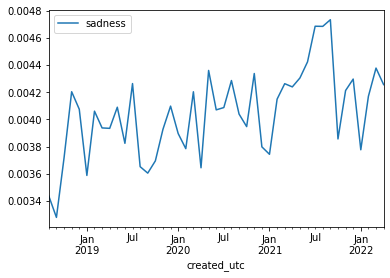

In [ ]:
df_plot_column_mean(df,"sadness",0)

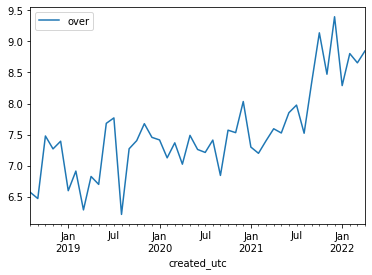

In [ ]:
df_plot_column(df,"emotional",0.01)

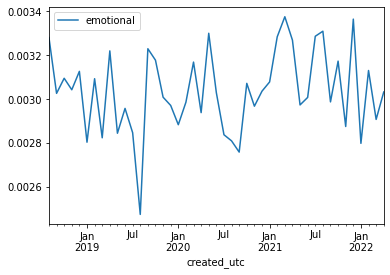

In [ ]:
df_plot_column_mean(df,"emotional",0)

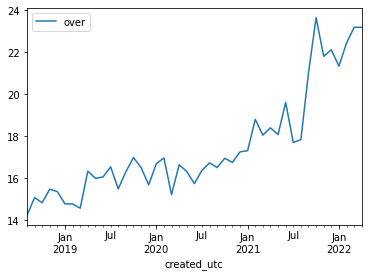

In [ ]:
df_plot_column(df,"shame",0.01)

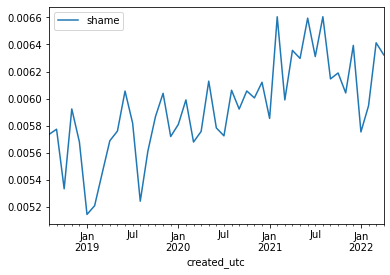

In [ ]:
df_plot_column_mean(df,"shame",0)

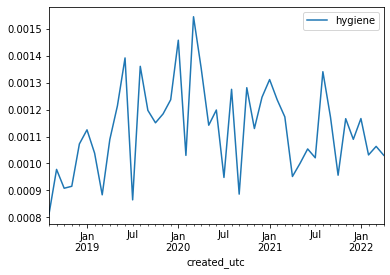

In [ ]:
df_plot_column_mean(df,"hygiene",0.01)

In [70]:
lexicon = Empath()
lexicon.analyze("life   away",categories=["death","fear","joy","positive_emotion"])

{'death': 1.0, 'fear': 0.0, 'joy': 0.0, 'positive_emotion': 0.0}